<a href="https://colab.research.google.com/github/PSLeon24/LearnAI/blob/main/CNN_Image_Classification_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN 이미지 분류

## 1. 데이터 전처리(Data Preprocessing)

In [1]:
import matplotlib.pyplot as plt

from torchvision.datasets.cifar import CIFAR10
# CIFAR-10은 10가지 클래스를 갖는 데이터셋 -> ex: 비행기, 트럭, 자동차, ...
from torchvision.transforms import ToTensor

# Load CIFAR-10 Dataset
training_data = CIFAR10(
    root = './',
    train = True,
    download = True,
    transform = ToTensor())

test_data = CIFAR10(
    root = './',
    train = False,
    download = True,
    transform = ToTensor())

100%|██████████| 170498071/170498071 [00:02<00:00, 79693735.88it/s]


Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


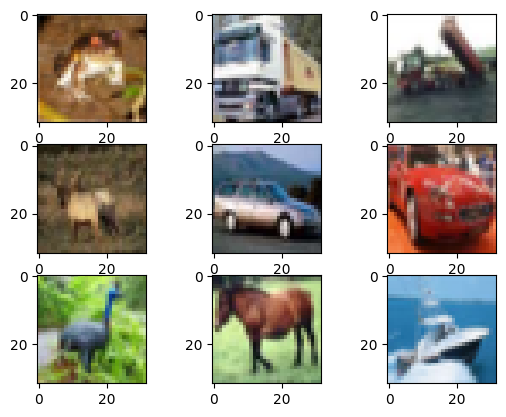

In [2]:
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(training_data.data[i])
plt.show()

## 1_2. 데이터 증강(Data Augmentation)
- 크롭핑(cropping): 이미지의 일정 부분을 도려내는 기법. 불필요한 부분을 도려낼 때 사용
- 좌우대칭(horizontal flip)
- 크롭핑과 좌우대칭 후, 이미지 크기에는 변화가 없도록 패딩 기법을 사용해 잘라낸 부분을 0으로 채우기
  - 패딩(padding): 이미지의 특정 영역을 0(혹은 아무 값)으로 채우는 기법. 0으로 채우면 제로 패딩이라고 함

|함수 원형|설명|제공 라이브러리|
|---|---|---|
|Compose([*tf])|전처리 함수 tf를 입력받아 차례대로 실행|torchvision.transforms|
|RandomCrop(size)|이미지의 일부를 제거한 뒤 size 크기로 복원|torchvision.transforms|
|RandomHorizontalFlip(p)|p 확률로 이미지를 좌우대칭 시킴|torchvision.transforms|

Files already downloaded and verified
Files already downloaded and verified


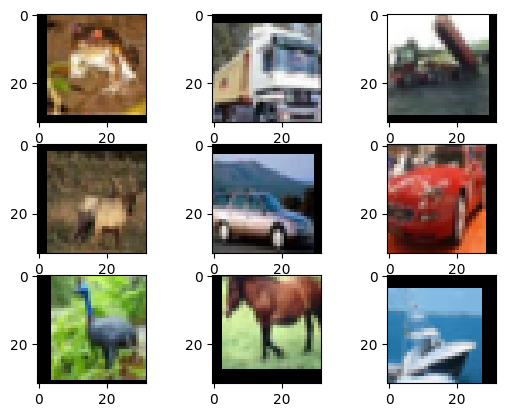

In [3]:
import matplotlib.pyplot as plt
import torchvision.transforms as T

from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import Compose
from torchvision.transforms import RandomHorizontalFlip, RandomCrop

transforms = Compose([ # 데이터 전처리 함수
    T.ToPILImage(),
    RandomCrop((32, 32), padding=4), # 랜덤으로 이미지 일부 제거 후 padding
    RandomHorizontalFlip(p=0.5) # y축을 기준으로 좌우대칭
])

training_data = CIFAR10(
    root = './',
    train = True,
    download = True,
    transform = transforms) # transfrom에는 데이터를 변환하는 함수가 들어감

test_data = CIFAR10(
    root = './',
    train = False,
    download = True,
    transform = transforms) # transfrom에는 데이터를 변환하는 함수가 들어감

for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(transforms(training_data.data[i]))
plt.show()

## 1_3. 이미지 정규화(image normalization)

- R, G, B 한쪽에 값이 편향되어 있으면 학습에 안 좋은 영향을 끼칠 수 있으므로 최대한 정규분포를 따르도록 정규화하는 작업이 필요

* 정규화(normalization)
- 데이터의 분포를 <b>정규분포</b>의 형태로 바꿔주는 것
  - 정규분포(normal distribution, gaussian distribution): 평균과 표준편차를 설명하는 분포 / 평균이 0, 표준편차가 1인 정규분포를 표준분포라고 한다.

### CIFAR10 Dataset의 평균과 표준편차 구하기
|함수 원형|설명|제공 라이브러리|
|---|---|---|
|stack(tesnor, dim)|tensor가 dim 방향으로 합쳐준다. 예를 들어(224, 224) 크기의 텐서를 dim=0 방향으로 텐서 세 개를 합치면 (3, 224, 224) 모양의 텐서가 된다.|torch|

In [4]:
import torch

training_data = CIFAR10(
    root = './',
    train = True,
    download = True,
    transform = ToTensor())

imgs = [item[0] for item in training_data]

# imgs를 하나로 합침
imgs = torch.stack(imgs, dim=0).numpy()

# rgb 각 평균
mean_r = imgs[:, 0, :, :].mean()
mean_g = imgs[:, 1, :, :].mean()
mean_b = imgs[:, 2, :, :].mean()
print('mean')
print(f'R:{mean_r:.4f}, G:{mean_g:.4f}, B:{mean_b:.4f}')

# rgb 각 표준편차
std_r = imgs[:, 0, :, :].std()
std_g = imgs[:, 1, :, :].std()
std_b = imgs[:, 2, :, :].std()
print('std')
print(f'R:{std_r:.4f}, G:{std_g:.4f}, B:{std_b:.4f}')

Files already downloaded and verified
mean
R:0.4914, G:0.4822, B:0.4465
std
R:0.2470, G:0.2435, B:0.2616


Files already downloaded and verified
Files already downloaded and verified


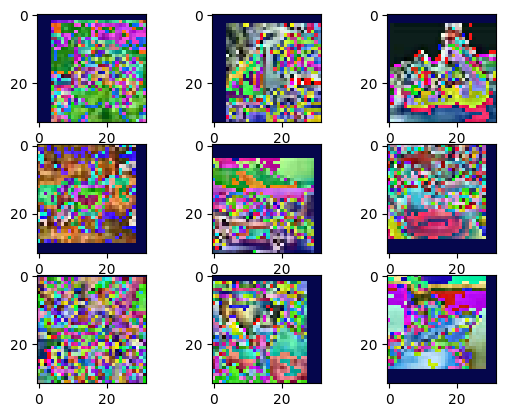

In [5]:
import matplotlib.pyplot as plt
import torchvision.transforms as T

from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import Compose
from torchvision.transforms import RandomHorizontalFlip, RandomCrop, Normalize

transforms = Compose([ # 데이터 전처리 함수
    T.ToPILImage(),
    RandomCrop((32, 32), padding=4), # 랜덤으로 이미지 일부 제거 후 padding
    RandomHorizontalFlip(p=0.5), # y축을 기준으로 좌우대칭
    T.ToTensor(),

    Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.243, 0.261)),
    T.ToPILImage()
])

training_data = CIFAR10(
    root = './',
    train = True,
    download = True,
    transform = transforms) # transfrom에는 데이터를 변환하는 함수가 들어감

test_data = CIFAR10(
    root = './',
    train = False,
    download = True,
    transform = transforms) # transfrom에는 데이터를 변환하는 함수가 들어감

for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(transforms(training_data.data[i]))
plt.show()

## 2. CNN으로 이미지 분류하기
1. 합성곱 3X3
2. ReLU
3. 합성곱 3X3
4. ReLU
5. 최대풀링(이미지 크기를 절반으로 줄이는 연산)

#### 2_1. 기본 블록 정의하기

In [6]:
# VGG 기본 블록 정의
import torch
import torch.nn as nn

class BasicBlock(nn.Module): # 기본 블록
  # 기본 블록을 구성하는 층
  def __init__(self, in_channels, out_channels, hidden_dim):
    super(BasicBlock, self).__init__()
    # Conv2d(in, out, kernel, stride): 합성곱을 계산
    self.conv1 = nn.Conv2d(in_channels, hidden_dim,
                           kernel_size = 3, padding = 1)
    self.conv2 = nn.Conv2d(hidden_dim, out_channels,
                           kernel_size = 3, padding = 1)
    self.relu = nn.ReLU()

    # stride: 커널의 이동거리
    # MaxPool2d(kernel, stride): 최대 풀링을 실행
    self.pool = nn.MaxPool2d(kernel_size = 2, stride = 2)

  def forward(self, x): # 기본 블럭의 순전파
    x = self.conv1(x)
    x = self.relu(x)
    x = self.conv2(x)
    x = self.relu(x)
    x = self.pool(x)

    return x

#### 2_2. CNN 모델 정의하기

In [13]:
class CNN(nn.Module):
  def __init__(self, num_classes):
    super(CNN, self).__init__()

    # 합성곱 기본 블록 정의
    self.block1 = BasicBlock(in_channels = 3, out_channels = 32, hidden_dim = 16)
    self.block2 = BasicBlock(in_channels = 32, out_channels = 128, hidden_dim = 64)
    self.block3 = BasicBlock(in_channels = 128, out_channels = 256, hidden_dim = 128)

    # 분류기 정의
    self.fc1 = nn.Linear(in_features = 4096, out_features = 2048)
    self.fc2 = nn.Linear(in_features = 2048, out_features = 256)
    self.fc3 = nn.Linear(in_features = 256, out_features = num_classes)

    # 분류기의 활성화 함수
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.block1(x)
    x = self.block2(x)
    x = self.block3(x) # x shape is (-1, 256, 4, 4)
    x = torch.flatten(x, start_dim = 1) # 1차원으로 평탄화

    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    x = self.relu(x)
    x = self.fc3(x)

    return x

#### 2_3. 모델 학습하기

In [14]:
# 데이터 증강 정의
from torch.utils.data.dataloader import DataLoader

from torch.optim.adam import Adam

transforms = Compose([
    RandomCrop((32, 32), padding = 4),
    RandomHorizontalFlip(p = 0.5),
    ToTensor(),
    Normalize(mean = (0.4914, 0.4822, 0.4465), std = (0.247, 0.243, 0.261))
])

In [15]:
from IPython.core.interactiveshell import available_events
# 데이터 로드 및 모델 정의
training_data = CIFAR10(root = './', train = True, download = True, transform = transforms)
test_data = CIFAR10(root = './', train = False, download = True, transform = transforms)

train_loader = DataLoader(training_data, batch_size = 32, shuffle = True)
test_loader = DataLoader(test_data, batch_size = 32, shuffle = False)

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

model = CNN(num_classes = 10)
model.to(device)

Files already downloaded and verified
Files already downloaded and verified
cuda


CNN(
  (block1): BasicBlock(
    (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): BasicBlock(
    (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block3): BasicBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=4096, out_features=2048, bias=True)
  (fc2): Linear(in_features=2048, out_features=256,

In [16]:
# learning rate
lr = 1e-3

optim = Adam(model.parameters(), lr = lr)

for epochs in range(100):
  for data, label in train_loader:
    optim.zero_grad()

    preds = model(data.to(device))

    loss = nn.CrossEntropyLoss()(preds, label.to(device))
    loss.backward()
    optim.step()

  print(f'epochs: {epochs + 1}, loss: {loss.item()}')

torch.save(model.state_dict(), "CIFAR.pth")

epochs: 1, loss: 1.2944953441619873
epochs: 2, loss: 1.256959080696106
epochs: 3, loss: 1.2103475332260132
epochs: 4, loss: 0.6277247071266174
epochs: 5, loss: 0.8739399909973145
epochs: 6, loss: 0.656192421913147
epochs: 7, loss: 0.5774560570716858
epochs: 8, loss: 0.11375464498996735
epochs: 9, loss: 0.7365378141403198
epochs: 10, loss: 0.3127354085445404
epochs: 11, loss: 0.8014481067657471
epochs: 12, loss: 0.7422015070915222
epochs: 13, loss: 0.5816378593444824
epochs: 14, loss: 0.5835270881652832
epochs: 15, loss: 0.5221394300460815
epochs: 16, loss: 0.8089097738265991
epochs: 17, loss: 0.6186450123786926
epochs: 18, loss: 0.2968730926513672
epochs: 19, loss: 0.4735616147518158
epochs: 20, loss: 0.17729789018630981
epochs: 21, loss: 0.8242084383964539
epochs: 22, loss: 0.7224799394607544
epochs: 23, loss: 0.8725035190582275
epochs: 24, loss: 0.35641077160835266
epochs: 25, loss: 0.5685468912124634
epochs: 26, loss: 0.6796103715896606
epochs: 27, loss: 0.38071227073669434
epochs: 

#### 2_4. 모델 성능 평가하기

In [17]:
model.load_state_dict(torch.load('CIFAR.pth', map_location = device))

num_corr = 0

with torch.no_grad():
  for data, label in test_loader:

    output = model(data.to(device))
    preds = output.data.max(1)[1]
    corr = preds.eq(label.to(device).data).sum().item()
    num_corr += corr

  print(f'Accuracy: {num_corr / len(test_data)}')

Accuracy: 0.8205
